In [10]:
import os
import sys
import numpy as np
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
sys.path.append(os.path.abspath(".."))
from src.outliers import detect_outliers_iqr, detect_outliers_zscore, winsorize_series


Clean_Data = os.getenv("CLEAN_DATA")
df = pd.read_csv(Clean_Data)
target_column = 'close'
outliers = detect_outliers_iqr(df[target_column])
outlier_z = detect_outliers_zscore(df[target_column], threshold=3.0)

print(outliers)
print("Total number of outliers is " + str(outliers.sum()))
print(outlier_z)

df_not_winsorized = df[target_column]
df_winsorized = winsorize_series(df[target_column])

0     False
1     False
2     False
3     False
4      True
      ...  
95     True
96     True
97    False
98    False
99    False
Name: close, Length: 100, dtype: bool
Total number of outliers is 7
0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: close, Length: 100, dtype: bool


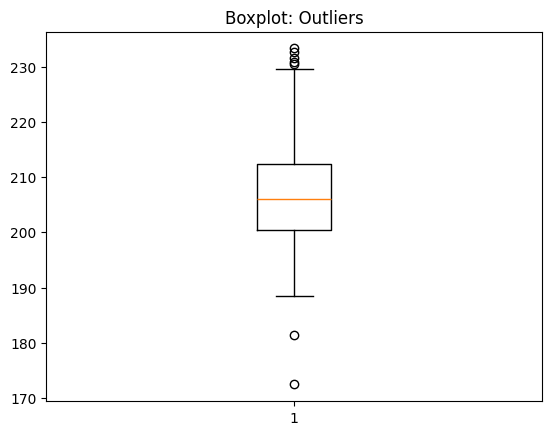

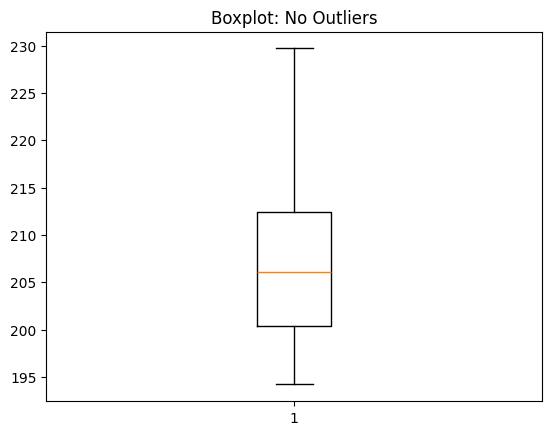

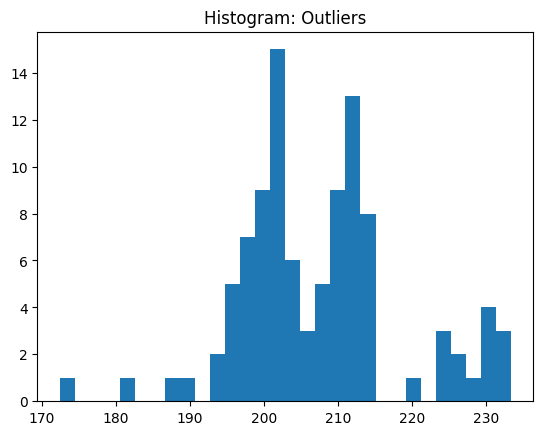

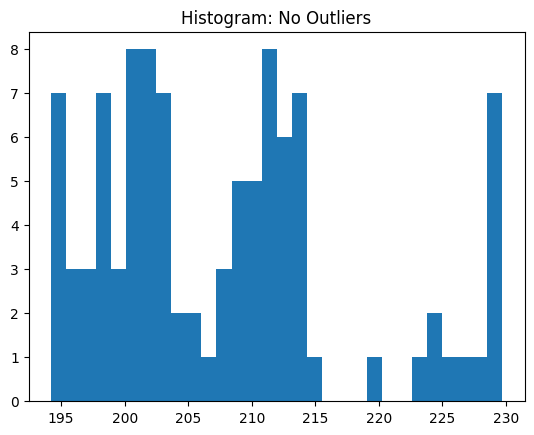

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(df_not_winsorized)
plt.title(f'Boxplot: Outliers')
plt.show()

plt.figure()
plt.boxplot(df_winsorized)
plt.title(f'Boxplot: No Outliers')
plt.show()

plt.figure()
plt.hist(df_not_winsorized, bins=30)
plt.title(f'Histogram: Outliers')
plt.show()

plt.figure()
plt.hist(df_winsorized, bins=30)
plt.title(f'Histogram: No Outliers')
plt.show()